#### Medical Claims 
<b>About the data set</b>
age: age of primary beneficiary
<br></br>
sex: insurance contractor gender, female, male
<br></br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
<br></br>
children: Number of children covered by health insurance / Number of dependents
<br></br>
smoker: Smoking
<br></br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
<br></br>
charges: Individual medical costs billed by health insurance
<br></br>
<b>Problems to solve</b> 
<br></br>
Are the medical claims made by smokers greater than non-smokers
<br></br>
Is there a significant difference of smokers across different regions

In [1]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
print(df.isnull().sum())
df.shape

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


(1338, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Change object type to appropiate data type
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


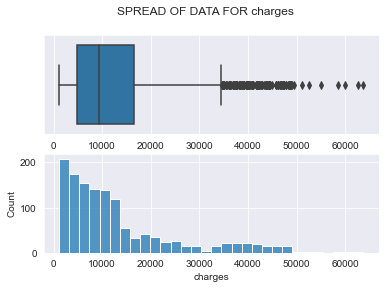

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

# numeric_data = df['charges'])

# def box_hist_plots(data):
#     Name=data.name.upper()
#     mean=data.mean()
#     median=data.median()
#     fig, (ax1, ax2) = plt.subplots(2, 1)
#     fig.suptitle("SPREAD OF DATA FOR " + Name)
#     sns.boxplot(x=data, data=data, ax=ax1)
#     sns.histplot(data, ax=ax2)
#     ax2.axvline(mean, color='r', linestyle='--',linewidth=2)
#     ax2.axvline(median, color='g', linestyle='-',linewidth=2)
#     plt.legend({'Mean': mean, 'Median': median})

# numeric_columns = numeric_data.columns
# for i in range(len(numeric_columns)):
#     box_hist_plots(df[numeric_columns[i]])
sns.set_style('darkgrid')
charges_data = df['charges']
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("SPREAD OF DATA FOR charges")
sns.boxplot(x='charges', data=df, ax=ax1)
sns.histplot(df['charges'], ax=ax2)
plt.show()

The data for charges is right skewed with many outliers on the higher end.

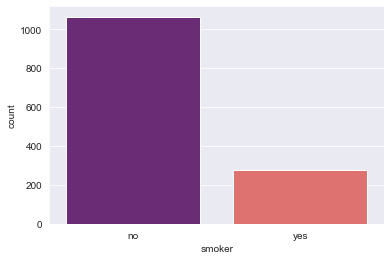

In [8]:
sns.countplot(x='smoker', data=df, palette='magma')
plt.show()

In [9]:
count_smoker = df['smoker'].value_counts(normalize=True)
count_smoker

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

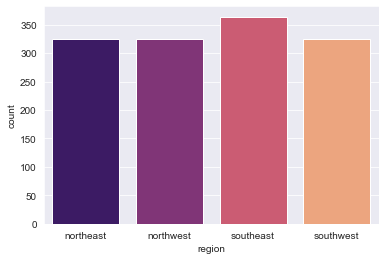

In [10]:
sns.countplot(x='region', data=df, palette='magma')
plt.show()

In [11]:
count_region = df['region'].value_counts(normalize=True)
count_region

southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64

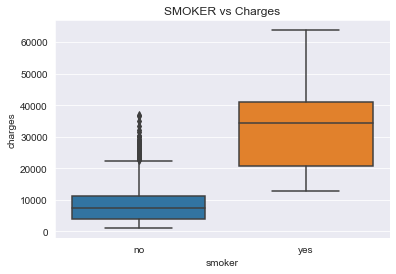

In [12]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('SMOKER vs Charges')
plt.show()

On average smokers medical costs billed by health insurance is greater than non smokers. Non-smokers have many outliers on the higher end. 

[Text(0.5, 1.0, 'SMOKER vs REGION')]

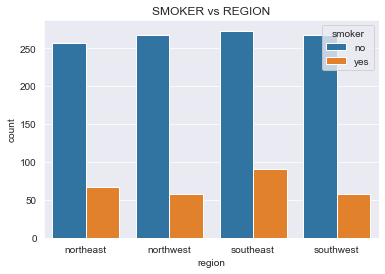

In [13]:
ax=sns.countplot(x='region', hue='smoker', data=df)
ax.set(title="SMOKER vs REGION")

Null hypothesis: The average charges of smokers is them same as nonsmokers     u1 = u2 <br></br>
Alternative hypothesis: The average charges of smokers is greater than nonsmokers u1 > u2 <br></br>
Will perform T-test since the std of the population is not known. <br></br>

In [17]:
# set alpha if p value is less than alpha than we reject the null hypothesis
alpha = 0.01

# get smoker and nonsmoker observations
smoker = df.loc[df['smoker'] == 'yes']
nonsmoker = df.loc[df['smoker'] == 'no']

# scale data to make # of observations the same 
print(smoker.shape)
print(nonsmoker.shape)
nonsmoker = nonsmoker[-274:]
print(nonsmoker.shape)
nonsmoker.head()

(274, 7)
(1064, 7)
(274, 7)


,age,sex,bmi,children,smoker,region,charges
984,20,male,30.115,5,no,northeast,4915.05985
985,44,female,25.800,1,no,southwest,7624.63000
986,43,male,30.115,3,no,northwest,8410.04685
987,45,female,27.645,1,no,northwest,28340.18885
988,34,male,34.675,0,no,northeast,4518.82625


In [21]:
charges_smoker = smoker['charges']
charges_nonsmoker = nonsmoker['charges']
print(f'Average charge of a smoker is {charges_smoker.mean().round(2)}')
print(f'Average charge of a nonsmoker is {charges_nonsmoker.mean().round(2)}')

Average charge of a smoker is 32050.23
Average charge of a nonsmoker is 8441.25


The average charge is much higher than a nonsmoker but is this difference staistically significant or is it by chance

In [24]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(charges_smoker, charges_nonsmoker)
one_tail_p_value = p_value / 2
print(f'T statistic = {t_statistic}, P value = {p_value}, \
P value for right tail = {one_tail_p_value}')

T statistic = 30.168384427571915, P value = 2.1604990031680377e-118, P value for right tail = 1.0802495015840189e-118


In [25]:
one_tail_p_value > alpha

False

Since the p_value for a right tailed test is lower than alpha we reject the null hypothesis and accept the alternative hypothesis. Meaning that on average the charges for smokers is greater than non smokers. 

Here we are comparing two different categorical variables, smoker and different region. So perform a Chi-sq Test.